In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import math
#%matplotlib qt

false
false
false


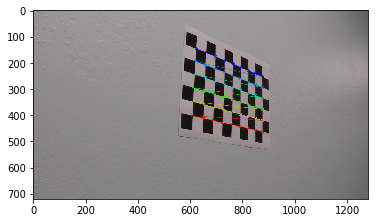

In [2]:
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

images = glob.glob('camera_cal/calibration*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        plt.imshow(img)
        cv2.waitKey(500)
    else:
        print("false")

        
cv2.destroyAllWindows()

In [3]:
%matplotlib inline

#img = cv2.imread('camera_cal/calibration1.jpg')
img = cv2.imread('test_images/straight_lines1.jpg')

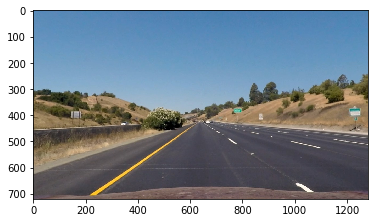

In [3]:
img = cv2.imread('test_images/straight_lines1.jpg')
img_size = (img.shape[1], img.shape[0])

#print(objpoints)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

In [6]:
'''f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted and Warped Image', fontsize=50)'''

"f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(img)\nax1.set_title('Original Image', fontsize=50)\nax2.imshow(dst)\nax2.set_title('Undistorted and Warped Image', fontsize=50)"

In [4]:
img_size = (dst.shape[1], dst.shape[0])
print (img_size)

(1280, 720)


In [25]:
def corners_unwarp(gray, nx, ny, mtx, dist):
    #undist = cv2.undistort(img, mtx, dist, None, mtx)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    #offset = 200
    img_size = (gray.shape[1], gray.shape[0])
    width = gray.shape[1]
    height = gray.shape[0]
    
    src = np.float32([[(520,500 ), (775,500), (920,600),(375,600)]])
    
    #src = np.array([[0,1280], [600, 400], 
     #                                [700, 400], 
     #                                [700,1280]], dtype=np.int32)
    #masked_edges = region_of_interest(gray, src)
    cv2.polylines(gray, np.int32([src]), 5, (255,255,255))
    
    dst = np.float32([[300,300], [1000,300], [1000,700], [300,700]])
                                      
    M = cv2.getPerspectiveTransform(src, dst)        
    warped = cv2.warpPerspective(img, M, img_size)

    return warped, M
    #return 



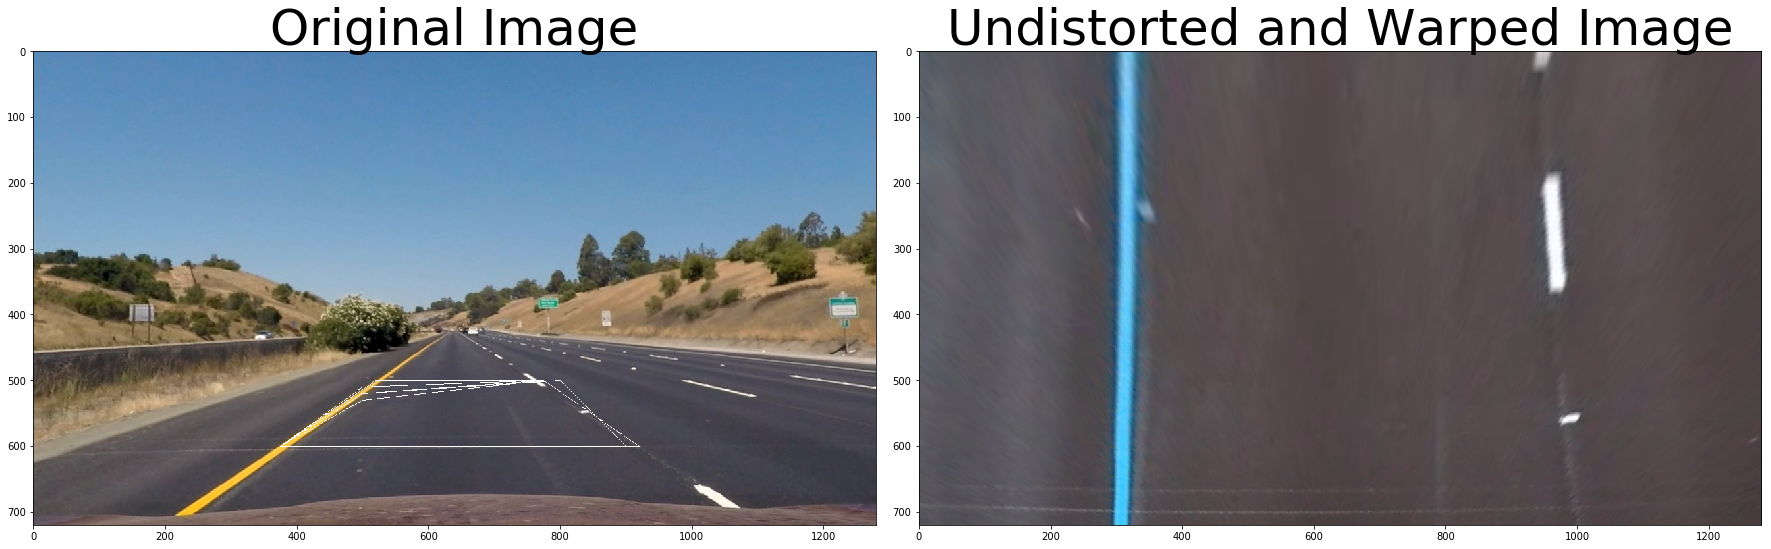

In [26]:
top_down, perspective_M = corners_unwarp(dst, 9, 6, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

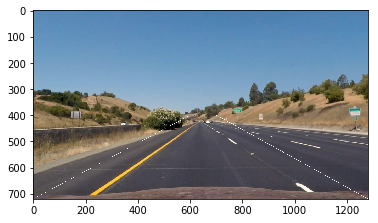

In [83]:
plt.imshow(dst)